# Exploratory Data Analysis (EDA)
To run all the code, you can use the "run all" function. You can also follow along and run the code accordingly. Note that we assume this project to be running with ***Jupyter Notebook***.

### Project setup
The following code cell imports all necessary libraries and sets global configurations for the dataframes.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

data_root = 'dataset'
dataset_name = "churn_data.csv"

### Reading in data

In [2]:
data_path = os.path.join(data_root, dataset_name)
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Basic data conversion for easier interpretability

In [4]:
# convert TotalCharges to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# convert SeniorCitizen to categorical
# df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
# map senior citizen to yes and no
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [5]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Data Analysis (EDA)
This section begins the process for conducting exploratory data analysis on our dataset.

### Numerical Features

We will begin by examining the fundamental statistics of the numerical feature within the dataset.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


According to the [data description provided by IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), the tenure is measured in months. Since the dataset originates from California, it is assumed that the values are in USD. <br>
`tenure` have a mean value of 32 months with a standard deviation of 24, `MonthlyCharges` have a mean of 64 USD with a standard deviation of 30 and `TotalCharges` have a mean of 2283 USD with a standard deviation of 2266.

According to Loukili, Messaoudi, and El Youbi (2023), it has been determined that the variable `TotalCharges` can be obtained by multiplying the variables `tenure` and `MonthlyCharges`. As a result, we will not be focusing extensively on the value. Below is the distribution chart for `tenure` and `MonthlyCharges`:

Text(0.5, 1.0, 'Distribution of Monthly Charges')

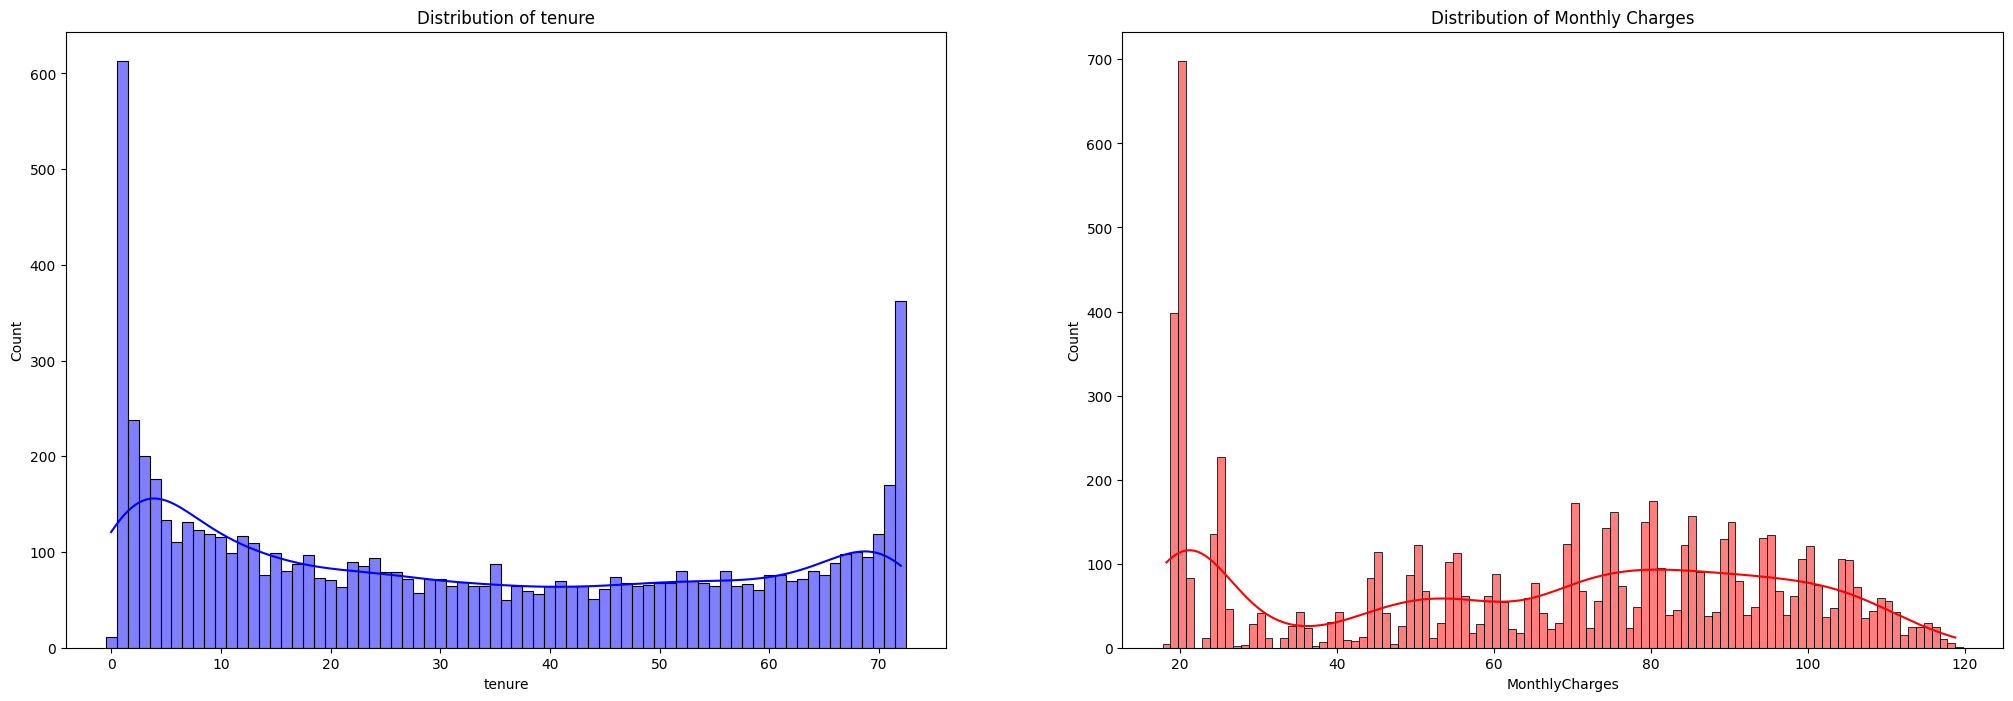

In [7]:
# Distribution of the tenure and MonthlyCharges 
fig, ax = plt.subplots(1, 2, figsize=(25, 8))
sns.histplot(df['tenure'], ax=ax[0], color='b', kde=True,  discrete=True)
ax[0].set_title('Distribution of tenure')

sns.histplot(df['MonthlyCharges'], ax=ax[1], color='r', kde=True, discrete=True)
ax[1].set_title('Distribution of Monthly Charges')

The distribution plot shows that tenure has a u-shaped distribution, with the majority of customers at one month of tenure. Since there appears to be a repeating pattern for monthly charges, we can bin the values for easier observation.

In [8]:
df_temp = df.copy()

C:\Users\xiaoc\AppData\Local\Temp\ipykernel_21028\3970522352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MonthlyChargesBin', data=df_temp, palette='viridis')


Text(0.5, 1.0, 'Distribution of Monthly Charges Bin')

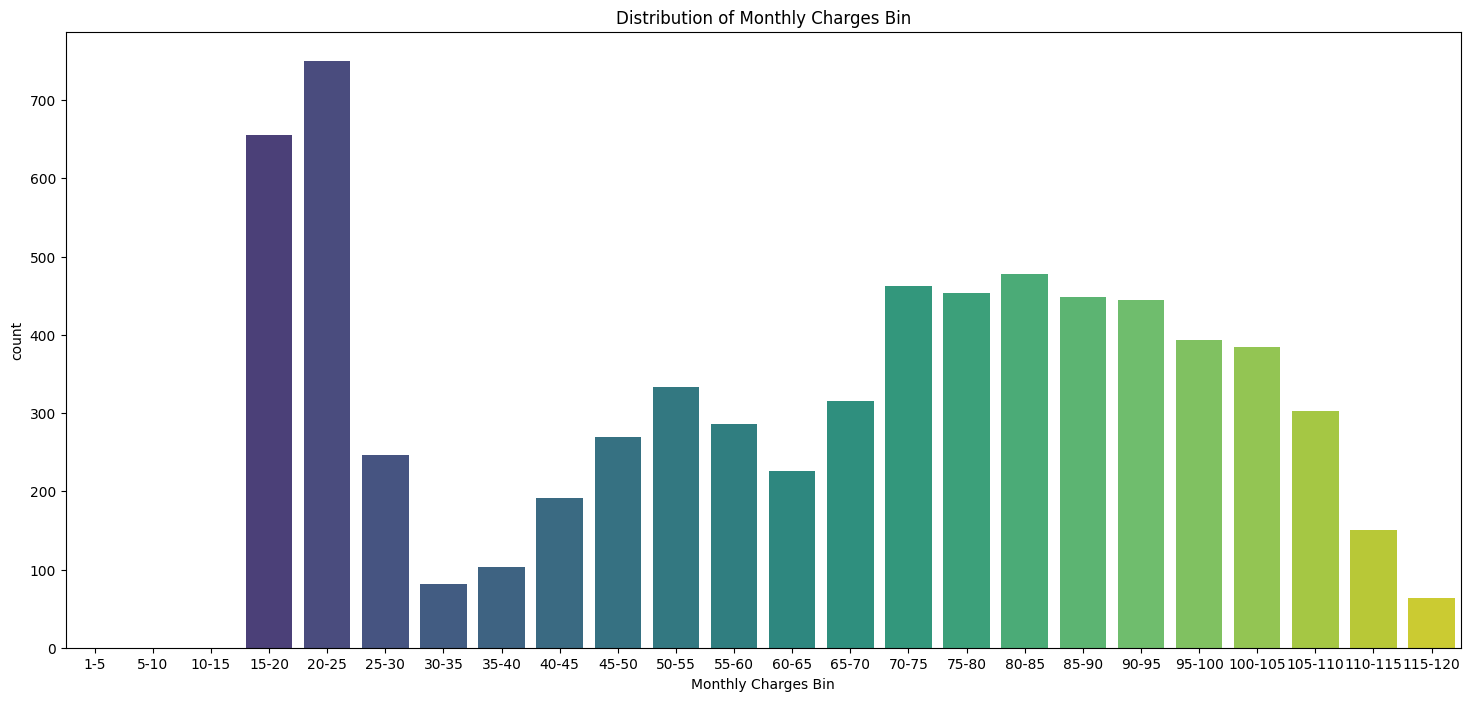

In [9]:
# bin MonthlyCharges for 1-5, 5-10, 10-15, 15-20, 20-25, 25-30, 30-35, 35-40, 40-45, 45-50, 50-55, 55-60, 60-65, 65-70, 70-75, 75-80, 80-85, 85-90, 90-95, 95-100, 100-105, 105-110, 110-115, 115-120
df_temp['MonthlyChargesBin'] = pd.cut(df_temp['MonthlyCharges'], bins=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120], labels=['1-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120'])

# distribution of MonthlyCharges bin
plt.figure(figsize=(18, 8))
sns.countplot(x='MonthlyChargesBin', data=df_temp, palette='viridis')
plt.xlabel('Monthly Charges Bin')
plt.title('Distribution of Monthly Charges Bin')


Based on the plot, we can roughly conclude that there are three main groups of customers for the telco company. These groups can be further categorized as the low-budget group, the middle-budget group, and the high-budget group.

C:\Users\xiaoc\AppData\Local\Temp\ipykernel_21028\1908076468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MonthlyChargesBin', data=df_temp, palette='viridis')


Text(0.5, 1.0, 'Distribution of Customer Budget Groups')

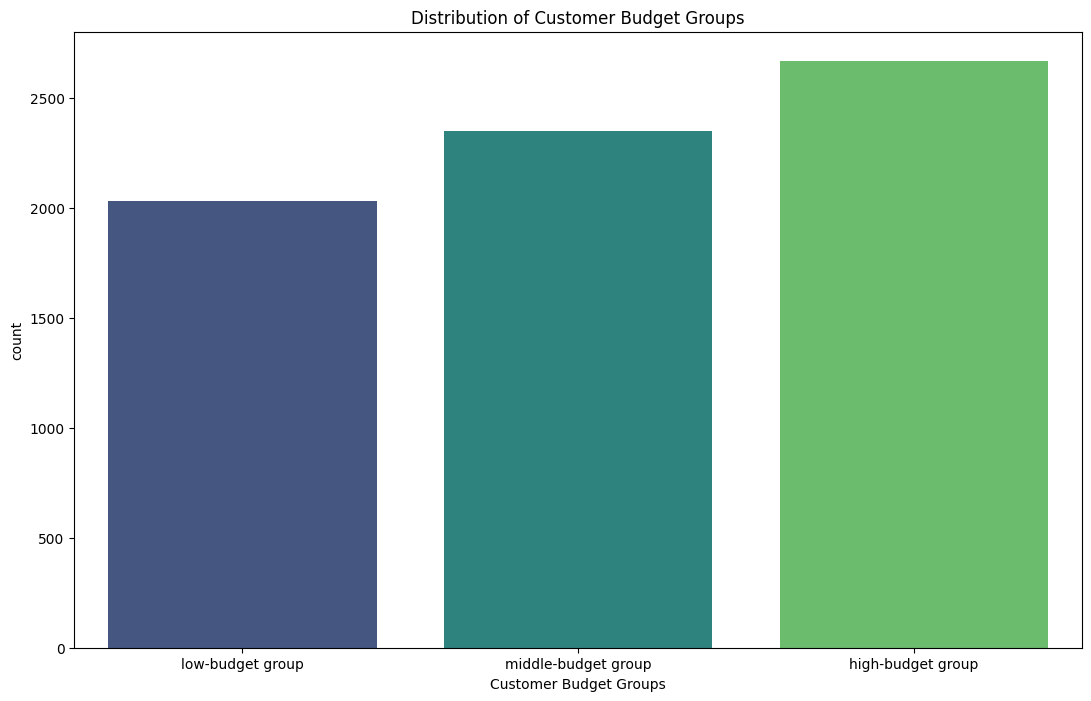

In [10]:
# bin monthly charges for 15-45, 45-80, 80-120
df_temp["MonthlyChargesBin"] = pd.cut(df_temp["MonthlyCharges"], bins=[15, 45, 80, 120], labels=['low-budget group', 'middle-budget group', 'high-budget group'])

plt.figure(figsize=(13, 8))
sns.countplot(x='MonthlyChargesBin', data=df_temp, palette='viridis')
plt.xlabel('Customer Budget Groups')
plt.title('Distribution of Customer Budget Groups')


Based on the plot above, it is evident that the majority of customers fall within the high-budget group, followed by the middle-budget group and then the low-budget group.

Next, we can analyze the Pearson correlation between each numerical feature:

Text(0.5, 1.0, 'Pearson Correlation for the numerical features')

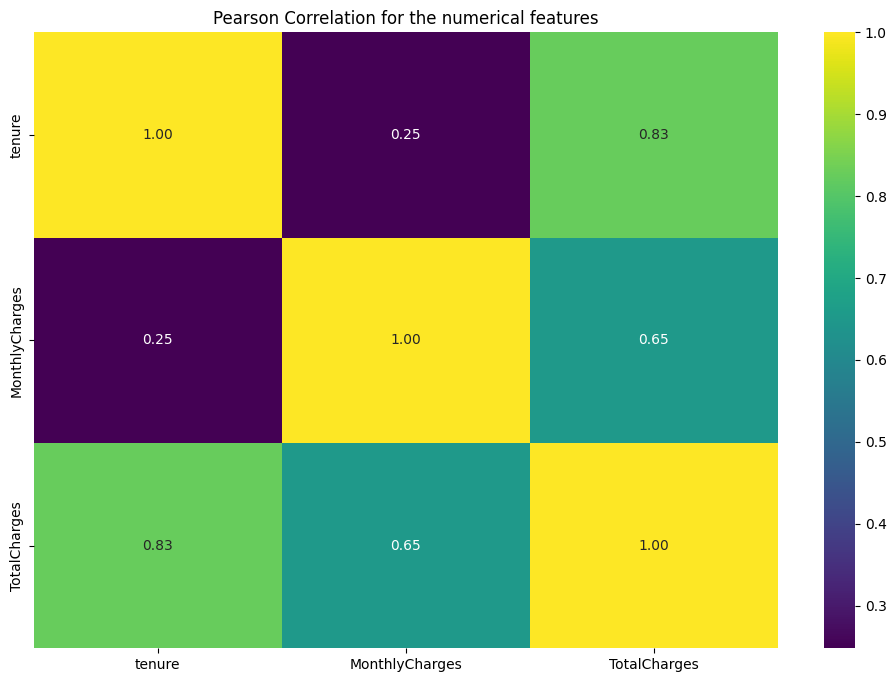

In [11]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Pearson Correlation for the numerical features')


Both `tenure` and `MonthlyCharges` have a high positive correlation with `TotalCharges`. This is expected and straightforward as the formula for `TotalCharges` is `TotalCharges = tenure * MonthlyCharges`. It is also evident from the heatmap that `tenure` and `MonthlyCharges` have a low correlation with each other. This indicates that the monthly charges of a customer have less impact on their tenure.

### Categorical Features

We begin by creating pie charts for all categorical variables except the target variables `Churn`.

In [12]:
df.drop(['customerID'], axis=1, inplace=True)

categorical_features = df.select_dtypes(include=["object", 'category']).columns.tolist()
len(categorical_features)

17

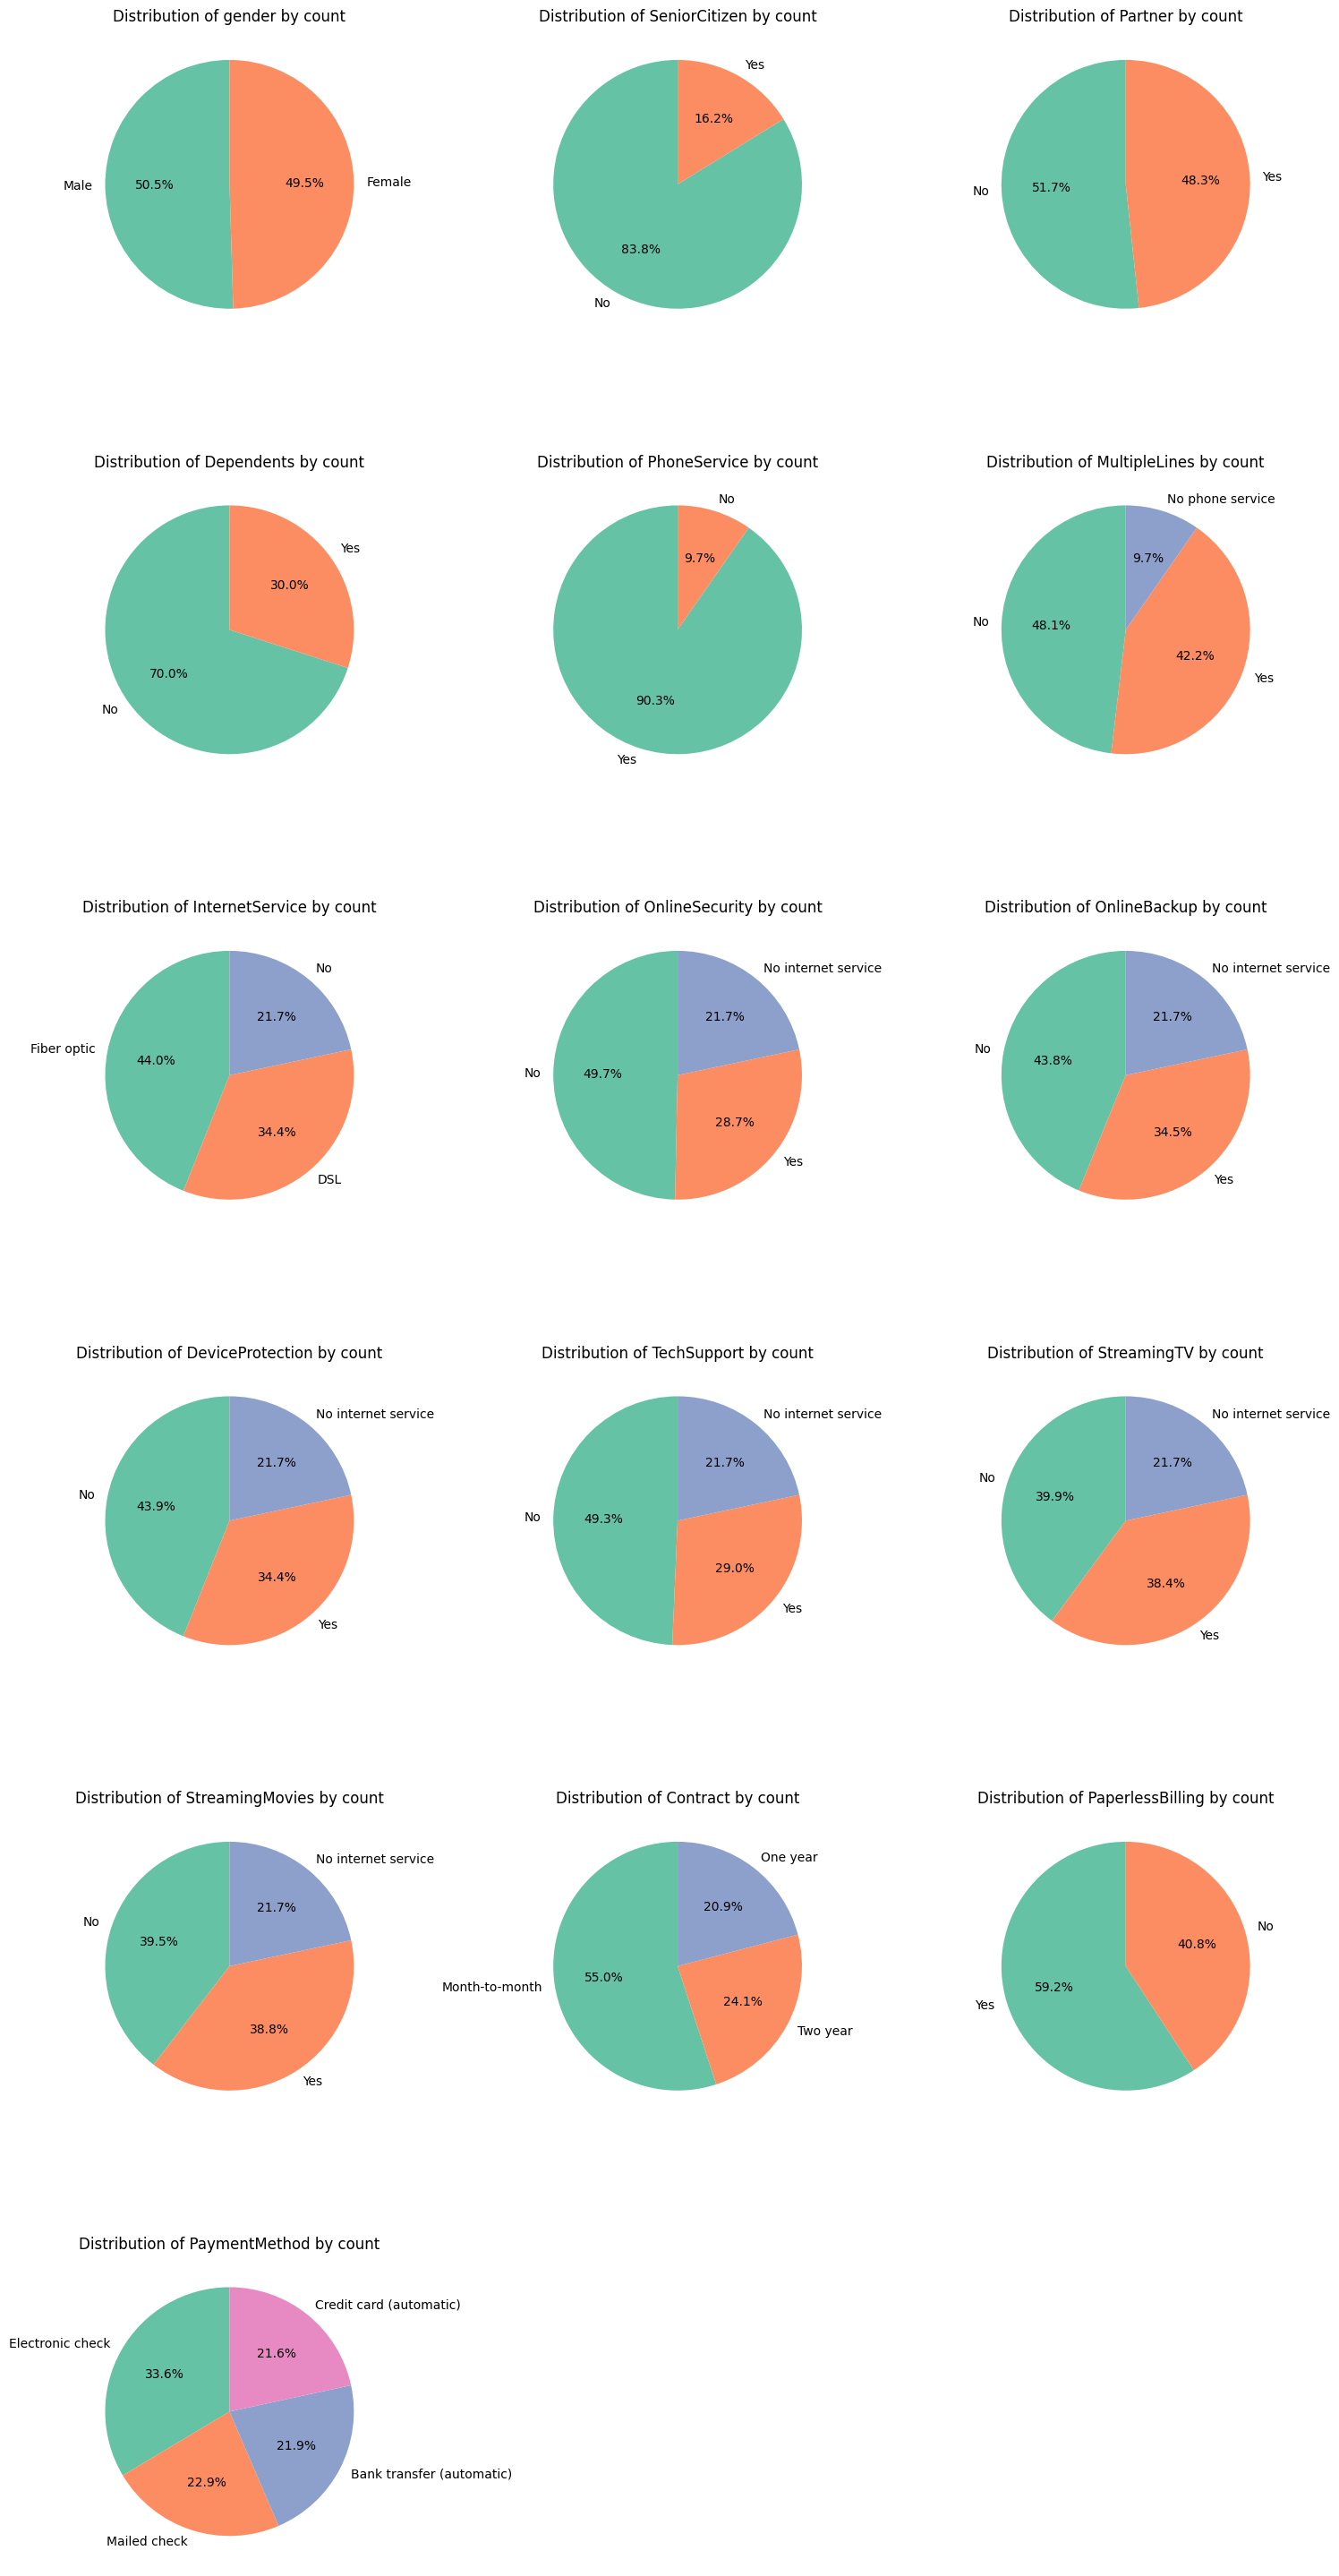

In [13]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
for i, ax in enumerate(ax.flatten()):
    if i < len(categorical_features)-1:
        df[categorical_features[i]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90, colors=sns.color_palette('Set2'))
        ax.set_title(f'Distribution of {categorical_features[i]} by count')
        ax.set_ylabel('')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

Next, we plot a barplot for target variable `Churn`:

Text(0.5, 0, 'Churn')

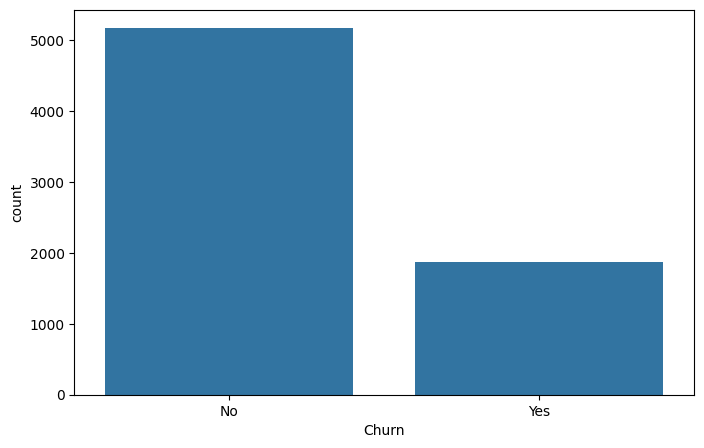

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn')

The data shows that the majority of customers are not churning, which is a positive indicator for the business. If there is a higher rate of customer churn than customer retention, it may signal underlying issues that need to be addressed.

### Further Exploration on `Churn`

In this section, our primary focus will be on the variable `Churn`, which serves as our target value. We will begin by examining its relationship with the numerical features of `tenure` and `MonthlyCharges`.

Text(0.5, 1.0, 'Scatterplot of Tenure and Monthly Charges')

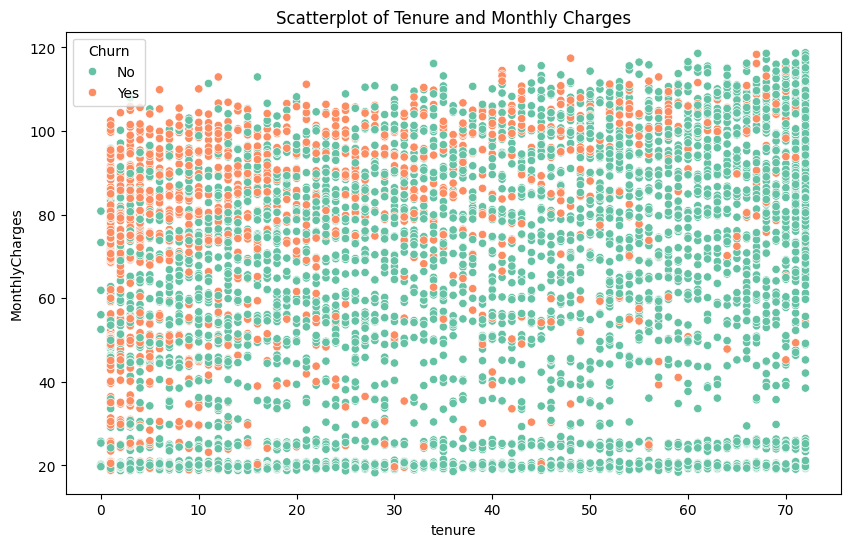

In [15]:
# scatterplot of tenure and MonthlyCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', palette='Set2')
plt.title('Scatterplot of Tenure and Monthly Charges')

From the scatterplot, it can be observed that the majority of customers who churned are those with low `tenure` and high `MonthlyCharges`, located in the cluster at the upper left part of the scatter plot. The distribution between `tenure` and `MonthlyCharges` appears to be fairly even, indicating that customers exist within any range of monthly charges at any tenure month. To delve deeper into this analysis, a new column called `churn_rate_by_tenure` has been created, which is calculated based on the percentage of customer churn for each tenure month.

In [16]:
df_temp["churn_rate_by_tenure"] = df_temp.groupby("tenure")["Churn"].transform(lambda x: (x == "Yes").mean() * 100)

Text(0.5, 1.0, 'Scatter plot of tenure and churn rate')

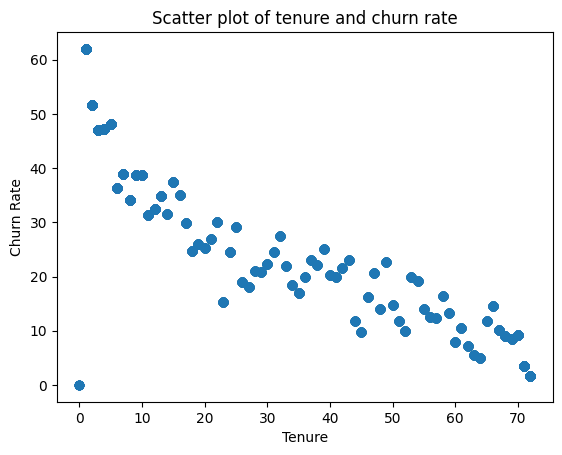

In [17]:
# scatter plot of tenure and churn rate
plt.scatter(df_temp["tenure"], df_temp["churn_rate_by_tenure"])
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.title("Scatter plot of tenure and churn rate")

Based on the scatter plot analysis, it is evident that there is a negative correlation between tenure and churn rate. Specifically, as tenure increases, the likelihood of customer churning decreases.

Next, we will assess the correlation between categorical values and the variable `Churn`. A comparative bar plot will be utilized for this analysis.

In [18]:
x_var = "gender"
y_var = "Churn"

df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=False).unstack(y_var)
df_grouped.plot.bar(stacked=True, ax=ax)
plt.show()

In [19]:
def plt_percentage_bar(ax, x_var, y_var, df):
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=False).unstack(y_var)
    df_grouped.plot.bar(stacked=True, ax=ax)
    
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        sum_row = row.sum()
        for element in row:
            percentage = round(element/sum_row * 100.0, 2)
            # if percentage > 0.1:
            ax.text(
                ix,
                cumulative + element / 2,
                f"{percentage} %",
                va="center",
                ha="center",
            )
            cumulative += element

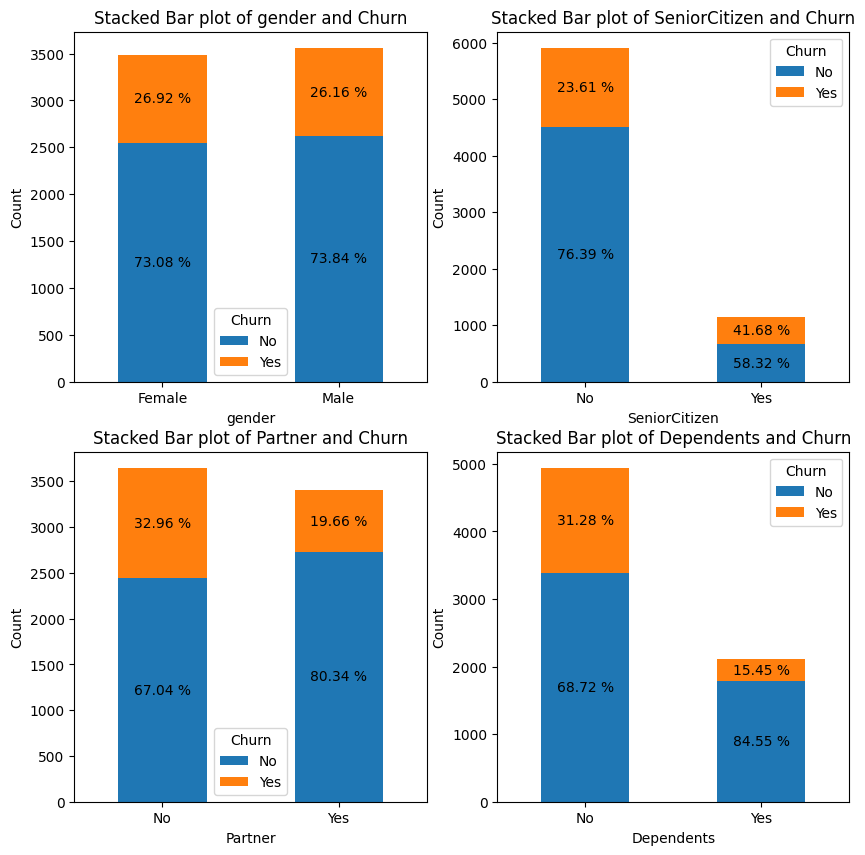

In [20]:
# get stacked bar plot for the categorical features
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# enumerate first 4 categorical features
for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        plt_percentage_bar(_ax, categorical_features[i], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i]} and Churn')
        _ax.set_ylabel('Count')
        _ax.tick_params(axis='x', rotation=0)
    else:
        _ax.set_visible(False)


The customer churn rate is consistent regardless of `gender`, suggesting that `gender` does not significantly impact customer churn. However, the churn rate is notably higher among senior citizens as well as individuals who are unpartnered and do not have dependents.

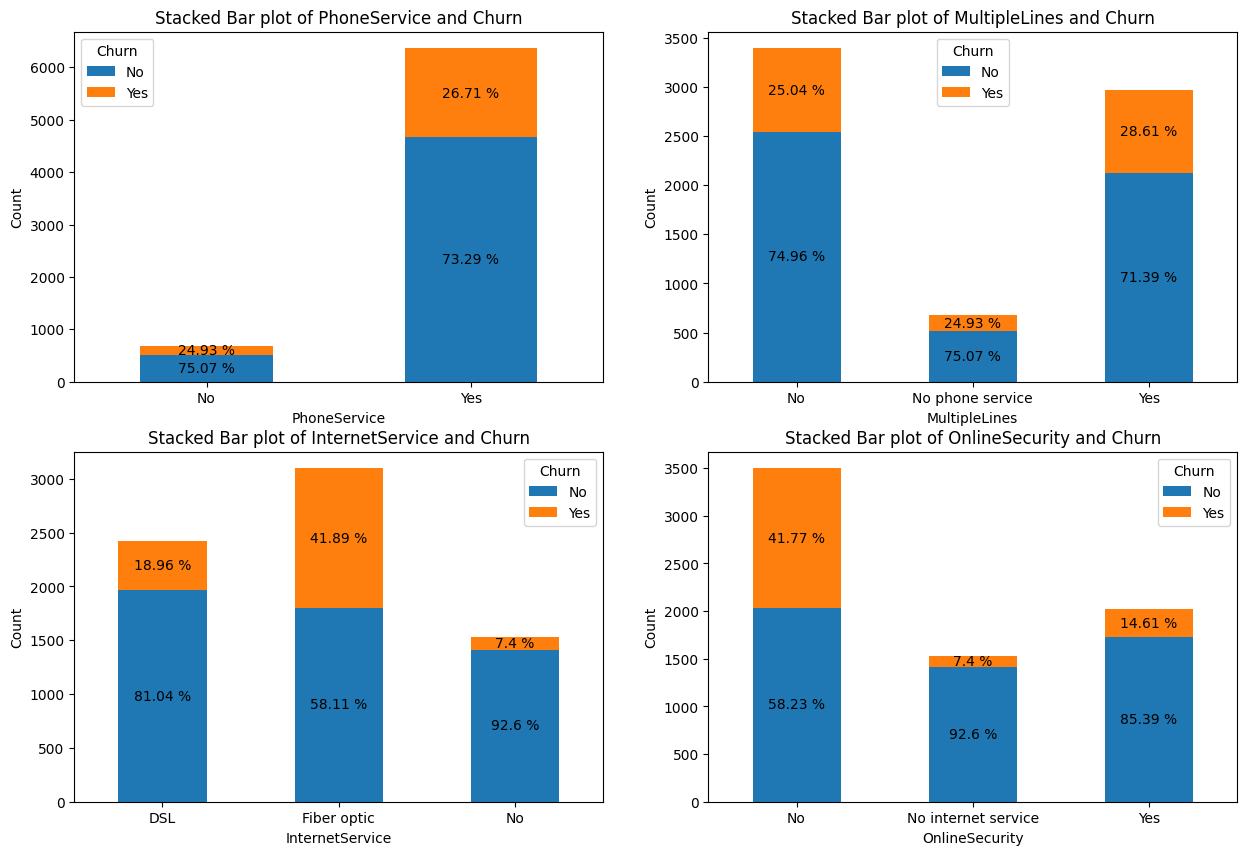

In [21]:
# get stacked bar plot for the categorical features
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# enumerate first 4 categorical features
for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        plt_percentage_bar(_ax, categorical_features[i+4], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i+4]} and Churn')
        _ax.set_ylabel('Count')
        _ax.tick_params(axis='x', rotation=0)
    else:
        _ax.set_visible(False)

The presence of `PhoneService` and `MultipleLines` does not appear to significantly impact customer churn. However, customers with Fiber optic as their `InternetService` have a higher churn rate, similar to those without `OnlineSecurity`.

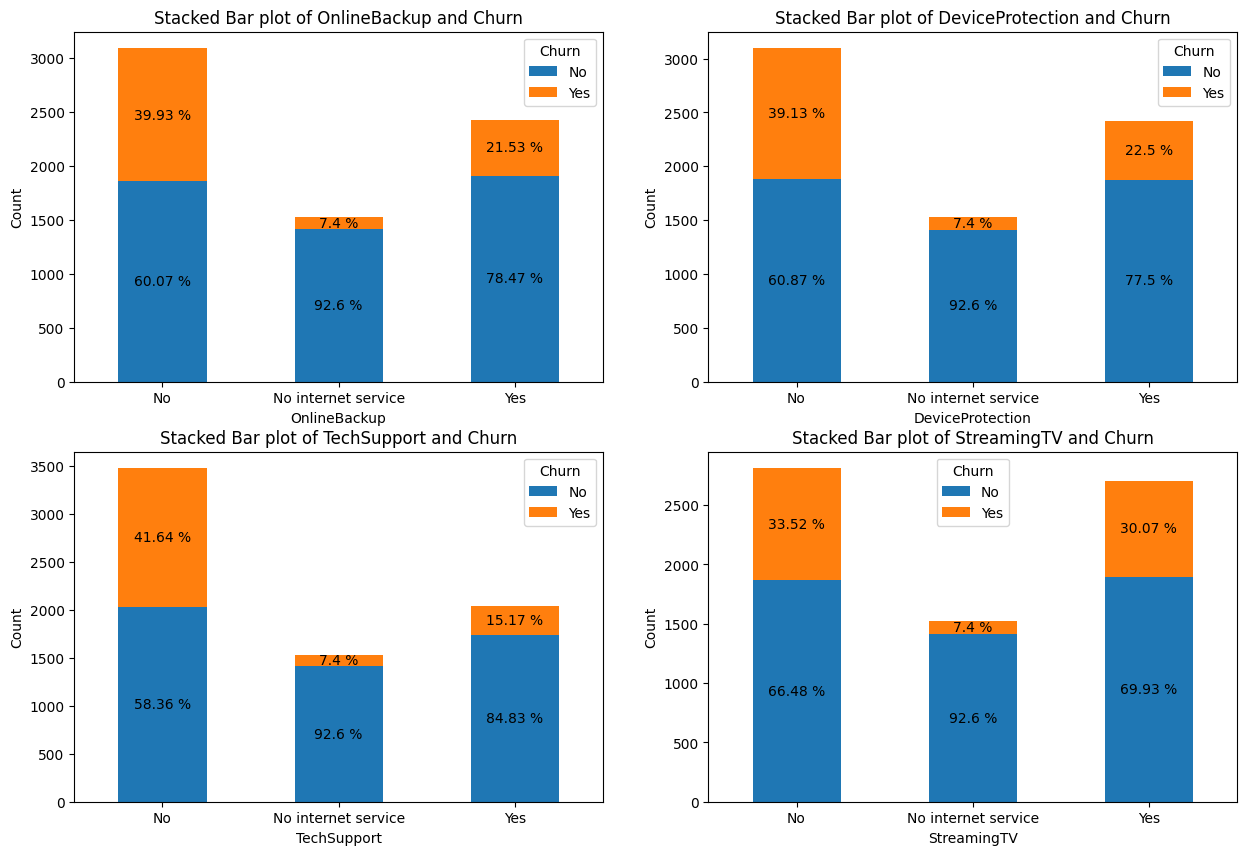

In [22]:
# get stacked bar plot for the categorical features
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# enumerate first 4 categorical features
for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        plt_percentage_bar(_ax, categorical_features[i+8], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i+8]} and Churn')
        _ax.set_ylabel('Count')
        _ax.tick_params(axis='x', rotation=0)
    else:
        _ax.set_visible(False)

There is a similarity in the churn rate ratios for `OnlineBackup`, `DeviceProtection`, and `StreamingTV`. Customers appear to be less inclined to churn after utilizing `TechSupport` services, indicating that the quality of customer service provided by the tech support team may have influenced their decision to remain with the company.

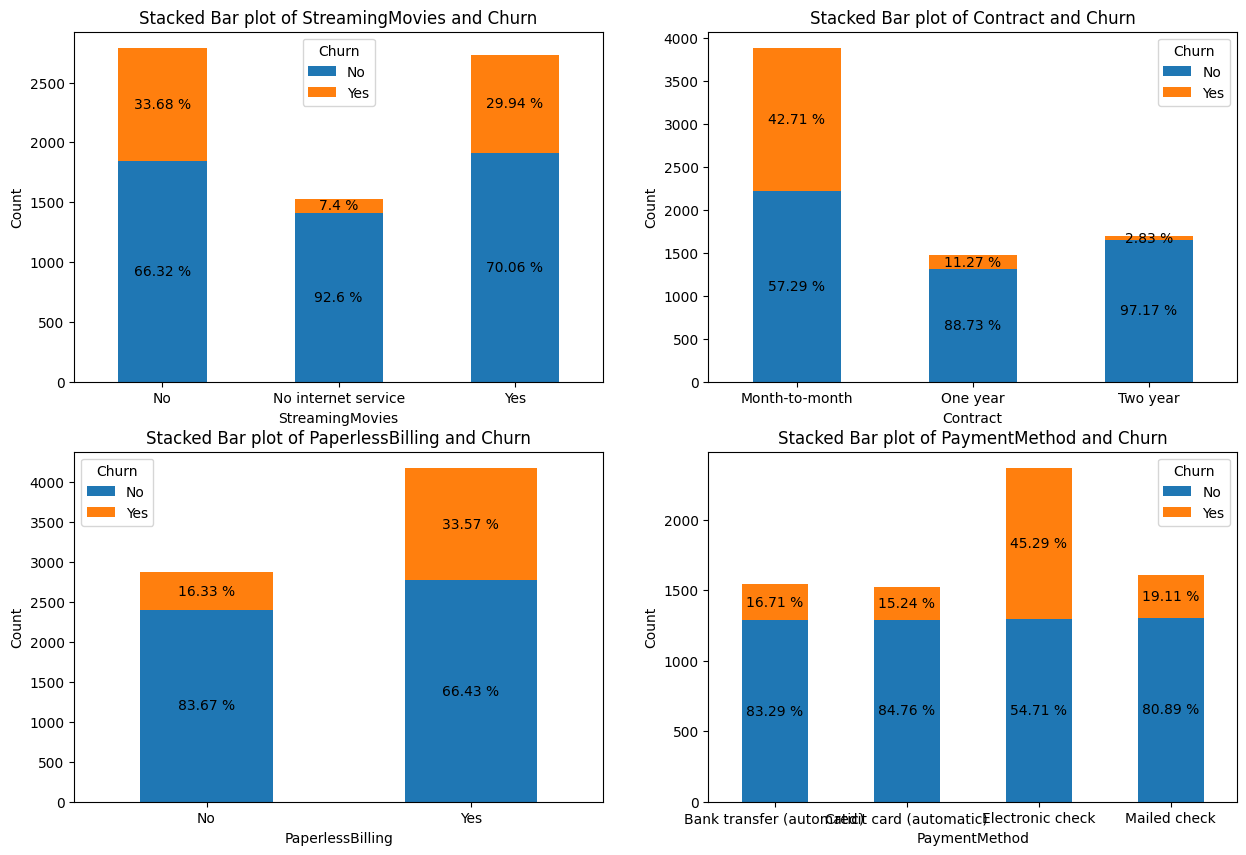

In [23]:
# get stacked bar plot for the categorical features
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# enumerate first 4 categorical features
for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        plt_percentage_bar(_ax, categorical_features[i+12], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i+12]} and Churn')
        _ax.set_ylabel('Count')
        _ax.tick_params(axis='x', rotation=0)
    else:
        _ax.set_visible(False)

There is minimal variation in churn rates between customers who stream movies and those who do not. Customers on a 'Month-to-month' contract exhibit a significant 42% churn rate, which is comparable to those who use 'Electronic check' as their `PaymentMethod` with a churn rate of 45%. Additionally, customers who opt for `PaperlessBilling` also display a slightly higher churn rate compared to those who receive paper billing.